In [ ]:
Veri işleme, görselleştirme ve modelleme kütüphanelerini yüklüyoruz. 
Bu bölümde özellikle DecisionTreeClassifier ve ağaç yapısını görmek 
için plot_tree fonksiyonu önemlidir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Karar Ağacı sınıflandırıcısı ve çizim kütüphanesi
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Gereksiz uyarıları kapatmak için
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Ön işleme yapılmış veri setini yüklüyor ve hedef değişkenimiz (RainTomorrow) 
ile öznitelikleri (X) ayırıyoruz.

In [2]:
# Veriyi yükle
data = pd.read_csv('cleaned_weather_vize.csv')

# Hedef değişken (y) ve Öznitelikler (X) ayrımı
X = data.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow']

print(f"Veri yüklendi. Boyut: {data.shape}")

Veri yüklendi. Boyut: (145460, 23)


In [ ]:
Burada kritik bir detay var: stratify=y. Veri setimiz dengesiz olduğu için
(Yağmursuz günler çok fazla), eğitim ve test setlerine de bu dengesizliğin eşit 
oranda dağıtılmasını sağlıyoruz. Böylece "Test setinde hiç yağmurlu gün yok" 
gibi bir hatanın önüne geçiyoruz.

In [3]:
# Train-Test Split (Katmanlı örnekleme ile)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Eğitim Seti: {X_train.shape}")
print(f"Test Seti: {X_test.shape}")

Eğitim Seti: (116368, 22)
Test Seti: (29092, 22)


In [ ]:
Karar Ağacını kuruyoruz.

criterion='gini': Bölünme kalitesini "Gini Safsızlığı" (Gini Impurity) ile ölçer. Amacı, 
her dalda tek bir sınıftan (Sadece Yağmur veya Sadece Güneş) örnekler bırakmaktır.

max_depth=5: Ağacın sonsuza kadar uzayıp veriyi ezberlemesini engellemek için derinliği 
5 ile sınırlandırdık. Bu, modelin genelleme yeteneğini artırır.

In [4]:
# 3. Model Eğitimi
print("Model Eğitiliyor: Decision Tree...")

# Modeli tanımla (Maksimum derinlik 5 olacak şekilde)
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Modeli eğit
dt_model.fit(X_train, y_train)

print("Eğitim tamamlandı.")

Model Eğitiliyor: Decision Tree...
Eğitim tamamlandı.


In [ ]:
Model test verisi üzerinde tahminlerini yapar. Karar ağaçları genellikle hızlıdır ve veri ölçekleme (scaling) gerektirmez.

In [5]:
# 4. Tahmin
y_pred = dt_model.predict(X_test)

print("\n--- Decision Tree Sonuçları ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


--- Decision Tree Sonuçları ---
Accuracy: 0.8397

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90     22717
           1       0.73      0.42      0.54      6375

    accuracy                           0.84     29092
   macro avg       0.79      0.69      0.72     29092
weighted avg       0.83      0.84      0.82     29092



In [ ]:
Bu bölüm Karar Ağacı algoritmasının en güçlü yanıdır: Açıklanabilirlik. Modelin hangi kurallara 
göre karar verdiğini dev bir şema üzerinde görebiliriz.

filled=True: Kutucukları, baskın olan sınıfın rengine (Mavi veya Turuncu) boyar.

feature_names=X.columns: Hangi sorunun sorulduğunu (Örn: Humidity3pm <= 71.5) gösterir.

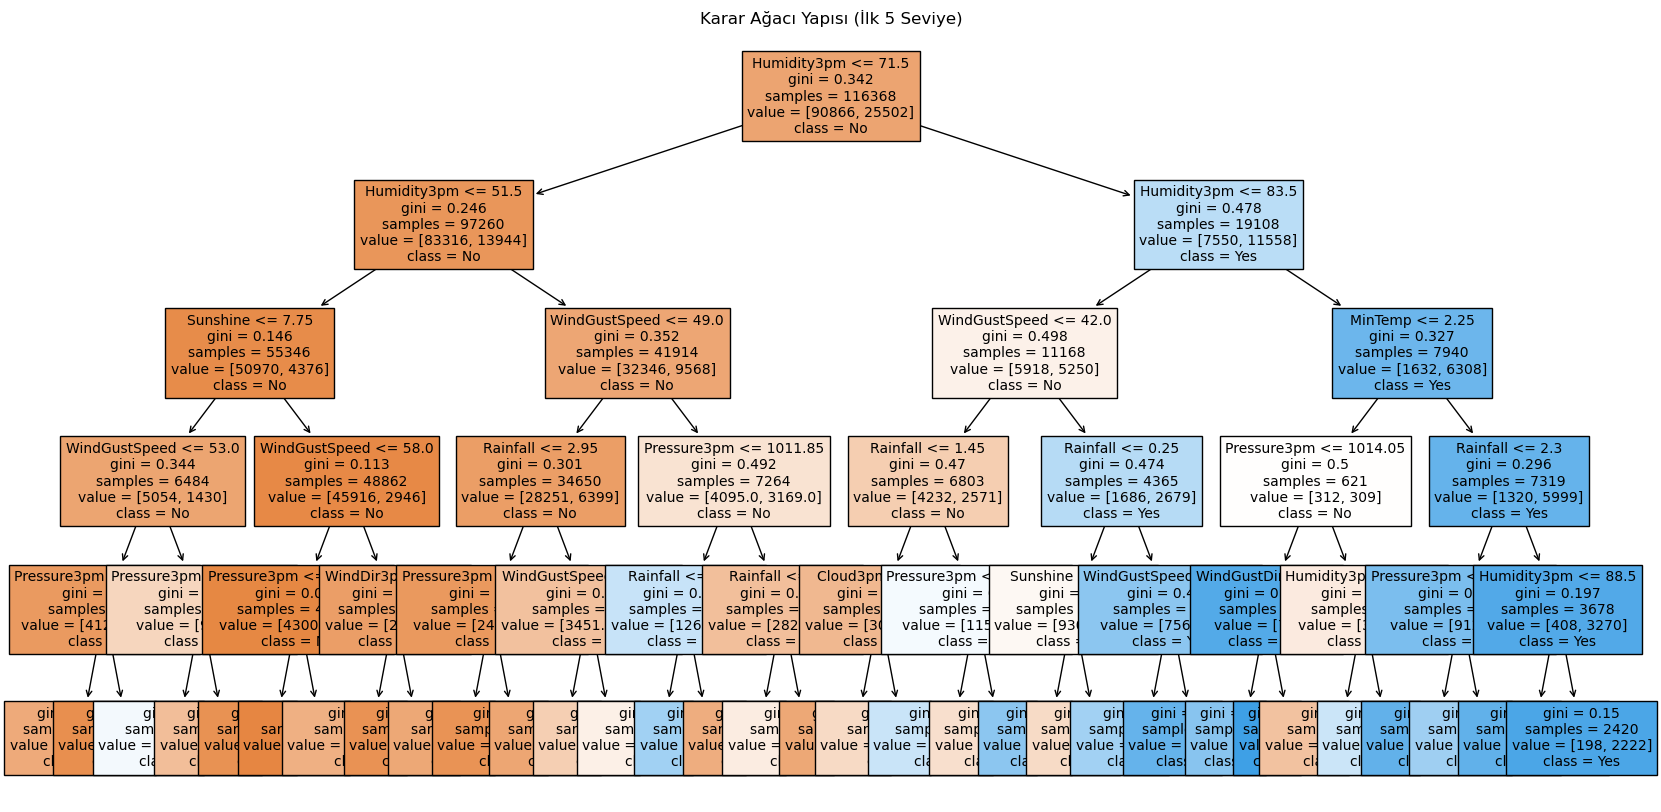

In [6]:
# 5. Ağaç Görselleştirme
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, fontsize=10)

plt.title("Karar Ağacı Yapısı (İlk 5 Seviye)")
plt.show()

Model Eğitiliyor: Decision Tree...

--- Decision Tree Sonuçları ---
Accuracy: 0.8397
              precision    recall  f1-score   support

           0       0.86      0.96      0.90     22717
           1       0.73      0.42      0.54      6375

    accuracy                           0.84     29092
   macro avg       0.79      0.69      0.72     29092
weighted avg       0.83      0.84      0.82     29092



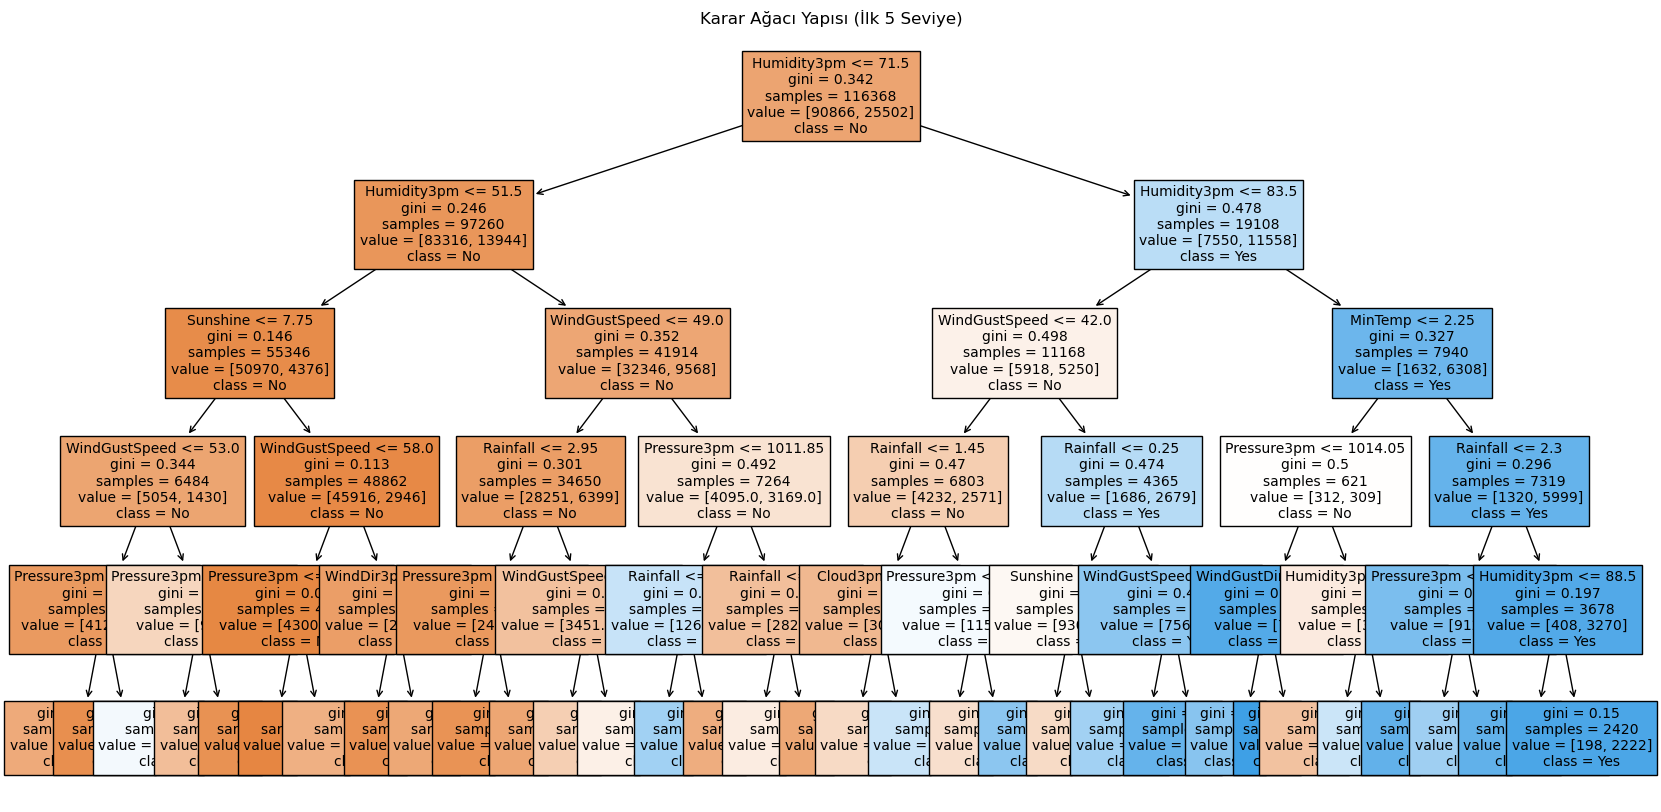

In [1]:
"""
# --- MUHAMMED_EFE_KUCUKYETER_22040101042_TeamShinningStars.ipynb ---
# Algoritma: Decision Tree (Karar Ağacı)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

# 1. Veri Yükle
df = pd.read_csv('cleaned_weather_vize.csv')
if 'RISK_MM' in df.columns: df.drop('RISK_MM', axis=1, inplace=True)

# 2. Veri Ayırma
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Model Eğitimi
print("Model Eğitiliyor: Decision Tree...")
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# 4. Tahmin
y_pred = dt_model.predict(X_test)

print("\n--- Decision Tree Sonuçları ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# 5. Ağaç Görselleştirme
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, fontsize=10)
plt.title("Karar Ağacı Yapısı (İlk 5 Seviye)")
plt.show()
"""